# Sprint 12. Machine learning avançat

__Resourses__

Recursos de l'aula i https://www.nltk.org

Examples https://www.programcreek.com/python/example/105043/sklearn.base.BaseEstimator

Web scraping amb Python. Web Scraping with Python, 2nd Edition [Book] (oreilly.com) https://www.oreilly.com/library/view/web-scraping-with/9781491985564/

# S12 T01: Pipelines, grid search i text mining

## Nivell 1. Exercici 1. Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [5]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [234]:
vuelos = pd.read_csv("DelayedFlights.csv")
vuelos.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [247]:
df = vuelos.drop(["Unnamed: 0" ,"FlightNum", "Diverted","TailNum","Year", "Cancelled", "CancellationCode"], axis=1)
df.shape

(1936758, 23)

In [248]:
# Deleting rows with null data, based on ArrDelay variable
df.dropna(subset=["ArrDelay"], inplace=True)
df["CarrierDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["LateAircraftDelay"].fillna(0, inplace = True)
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
df.isna().sum().mean()

0.0

In [249]:
df['Target'] = df['ArrDelay'].apply(lambda x: 1 if x >= 15 else 0).astype(int)
df['Target'].value_counts(normalize = True)

1    0.646913
0    0.353087
Name: Target, dtype: float64

In [250]:
df2 = df.sample(n = 5000, random_state = 123)
df2.shape

(5000, 24)

In [251]:
features = ['Month', 'DepTime', 'CRSElapsedTime','ArrTime', 'DepDelay' , 'AirTime', 'Distance']
X = df2[features] # Features
y = df2.Target # Target variable

In [252]:
# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Applying pipeline

In [255]:
apply_pipe = Pipeline([('scaler', StandardScaler()), ('RFC', RandomForestClassifier())])

In [257]:
pipe = apply_pipe.fit(X_train, y_train) 
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFC', RandomForestClassifier())])

In [258]:
pipe.score(X_test, y_test)

0.8472

In [259]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       424
           1       0.91      0.86      0.88       826

    accuracy                           0.85      1250
   macro avg       0.83      0.84      0.83      1250
weighted avg       0.85      0.85      0.85      1250



In [261]:
# Confusion matrix
cmatrix = metrics.confusion_matrix(y_test, y_pred)
cmatrix

array([[352,  72],
       [119, 707]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

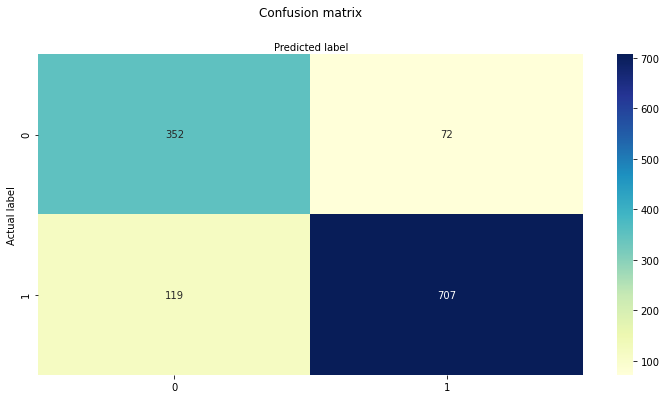

In [262]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(10, 5))
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [290]:
param_grid = dict(
                model__n_estimators = [50,100,200],
                model__max_depth = [10, 20, 50],
                model__max_features = ['auto', 'sqrt']
    )

In [293]:
param_grid = {
    'RFC__max_depth': [4, 5, 10],
    'RFC__max_features': [2, 3],
    'RFC__min_samples_leaf': [3, 4, 5],
    'RFC__n_estimators': [100, 200, 300]
}

In [297]:
grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=1, cv=3, scoring='f1')

In [298]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RFC', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RFC__max_depth': [4, 5, 10],
                         'RFC__max_features': [2, 3],
                         'RFC__min_samples_leaf': [3, 4, 5],
                         'RFC__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [300]:
grid_search.best_score_

0.8722376609745855

In [301]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFC',
                 RandomForestClassifier(max_depth=10, max_features=2,
                                        min_samples_leaf=5,
                                        n_estimators=300))])

In [305]:
grid_search.score(X_test, y_test)

0.8738965952080707

In [306]:
mean_squared_error(y_test, grid_search.predict(X_test))

0.16

In [308]:
print("score model: ", pipe.score(X_test, y_test))
print("score grid_search:", grid_search.score(X_test, y_test))
print("mean squared error: ", mean_squared_error(y_test, grid_search.predict(X_test)) )

score model:  0.8472
score grid_search: 0.8738965952080707
mean squared error:  0.16


the original model is better explained by the best estimators.

In this case, the new model is able to explain the 87% of the variance in the delay flights withn MSE of 0.16.

## Nivell 2. Exercici 2. Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

__Recursos__
Using Natural Language Processing To Check Word Frequency In ‘The Adventure of Sherlock Holmes’ https://analyticsindiamag.com/using-natural-language-processing-to-check-word-frequency-in-the-adventure-of-sherlock-holmes/

__Source__
Esohe G. Irabor, Brandyn White.__4 ways to help STEM majors stay the course__ TheConversation.February 11, 2022. https://theconversation.com/4-ways-to-help-stem-majors-stay-the-course-173184 

In [2]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import defaultdict
nltk.download('punkt', quiet=True)
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [34]:
dftext = open("STEM.txt","r",encoding='utf-8').read().lower()

In [148]:
dftext[:500] #taking just a piece of te text

'black and latino students who start out majoring in stem – or science, technology, engineering or mathematics – are more likely than their white peers to switch fields or leave without a degree.\n\nsome students leave because they feel isolated on campus. others may lack the type of technical skills, such as effective communication in science, needed to persist in these subjects. when students from underrepresented groups leave stem majors, it affects all of society, hampering the overall potentia'

In [134]:
# Sentence Tokens
sentences = sent_tokenize(dftext)
print(sentences[:10])

['black and latino students who start out majoring in stem – or science, technology, engineering or mathematics – are more likely than their white peers to switch fields or leave without a degree.', 'some students leave because they feel isolated on campus.', 'others may lack the type of technical skills, such as effective communication in science, needed to persist in these subjects.', 'when students from underrepresented groups leave stem majors, it affects all of society, hampering the overall potential for critical thinking, creativity and innovation.', 'scientific innovation and progress require the talents of people from diverse backgrounds.', 'as ph.d. biology candidates at one of the nation’s top historically black universities, we joined a group of scientists in 2021 to discover and recommend a few things to help underrepresented students build their scientific identity and stick with stem.', 'what follows are four of those recommendations.', 'don’t let yourself be misled.', '

In [136]:
# Words Tokens
words= word_tokenize(dftext)
print(words[:50])

['black', 'and', 'latino', 'students', 'who', 'start', 'out', 'majoring', 'in', 'stem', '–', 'or', 'science', ',', 'technology', ',', 'engineering', 'or', 'mathematics', '–', 'are', 'more', 'likely', 'than', 'their', 'white', 'peers', 'to', 'switch', 'fields', 'or', 'leave', 'without', 'a', 'degree', '.', 'some', 'students', 'leave', 'because', 'they', 'feel', 'isolated', 'on', 'campus', '.', 'others', 'may', 'lack', 'the']


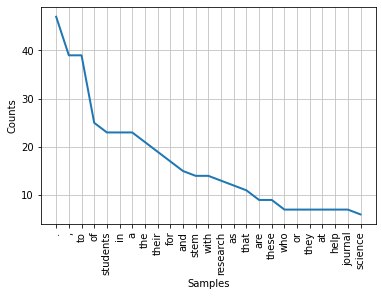

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [137]:
words_freq = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

We have a frequency of appearance of all the words but also punctuation marks that we have to remove.

__filtering just the words in the text__

In [186]:
# find just the words in the text
find_words = re.findall('\w+',dftext)
find_words[:30]

['black',
 'and',
 'latino',
 'students',
 'who',
 'start',
 'out',
 'majoring',
 'in',
 'stem',
 'or',
 'science',
 'technology',
 'engineering',
 'or',
 'mathematics',
 'are',
 'more',
 'likely',
 'than',
 'their',
 'white',
 'peers',
 'to',
 'switch',
 'fields',
 'or',
 'leave',
 'without',
 'a']

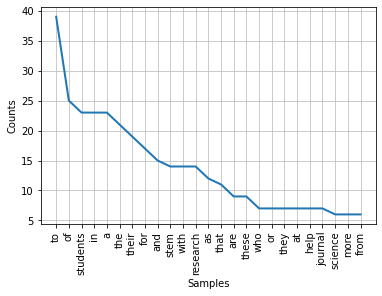

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [173]:
data_freq = nltk.FreqDist(find_words)
data_freq.plot(25, cumulative=False)

The graphic above shows the frequencies of all the words, including those that are not imteresting for the analysis: the stopwords.

__Stopword filtering__

In [174]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nuyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
stops = set(stopwords.words('english'))
len(stops)

179

In [176]:
# These are a dict of words that can be omited from the analysis
print(stops)

{'shouldn', "isn't", 'that', 'what', 'was', 'do', 'doing', 'against', 'under', 'then', 'aren', 'these', 'just', 'any', 'they', 'about', 'once', 'into', 'hasn', 'can', 'as', 'further', 'at', 'below', 'will', 'yours', "doesn't", "that'll", 't', 'same', "you've", 'be', "shan't", 'had', "didn't", 'those', 'during', 'couldn', 'them', 'not', 'how', "shouldn't", "needn't", 'our', 'y', 'than', 'out', 's', 'itself', 'too', 'until', 'other', 'where', 'to', 'only', 'with', 'themselves', 'no', 'am', 'who', 'up', 'whom', 'have', 'hadn', 'for', 'more', 'mustn', "she's", 'he', 'both', 'having', 'here', 'before', 'ours', 'she', 'himself', 'from', 'now', 'through', 'her', 'hers', 'the', 'been', 'such', 'i', 'each', 'we', 'it', 'there', 'own', 'does', 'and', 'by', 'his', 'myself', 'all', "hasn't", 'isn', 'why', 'but', "haven't", 'down', 'few', 'theirs', 'me', 'which', 'wasn', "you'd", "aren't", 'has', "don't", 'above', 've', 'a', "you'll", 'on', 'm', 'weren', 'wouldn', "you're", "weren't", "hadn't", 'in

__Remove all the words that are in stopwords from the original text__

In [184]:
words_nonstop = []
for word in find_words: 
    if word not in stops:
        words_nonstop.append(word)

In [187]:
print(words_nonstop [:50])

['black', 'latino', 'students', 'start', 'majoring', 'stem', 'science', 'technology', 'engineering', 'mathematics', 'likely', 'white', 'peers', 'switch', 'fields', 'leave', 'without', 'degree', 'students', 'leave', 'feel', 'isolated', 'campus', 'others', 'may', 'lack', 'type', 'technical', 'skills', 'effective', 'communication', 'science', 'needed', 'persist', 'subjects', 'students', 'underrepresented', 'groups', 'leave', 'stem', 'majors', 'affects', 'society', 'hampering', 'overall', 'potential', 'critical', 'thinking', 'creativity', 'innovation']


In [230]:
data_analysis = nltk.FreqDist(words_nonstop)
data_analysis

FreqDist({'students': 23, 'stem': 14, 'research': 14, 'help': 7, 'journal': 7, 'science': 6, 'underrepresented': 6, 'majors': 6, 'college': 6, 'clubs': 6, ...})

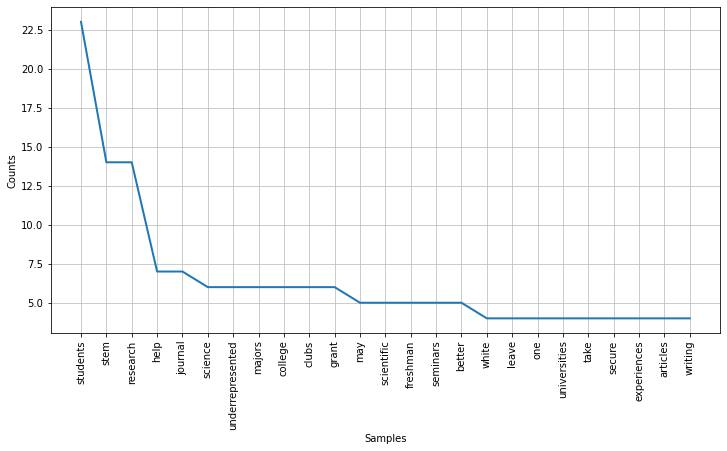

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [233]:
plt.subplots(figsize=(12,6))
text_freq = nltk.FreqDist(words_nonstop)
text_freq.plot(25, cumulative=False)

The words Students, STEM and research appear with much more frequence in the text.

__Creating a Tag Cloud__

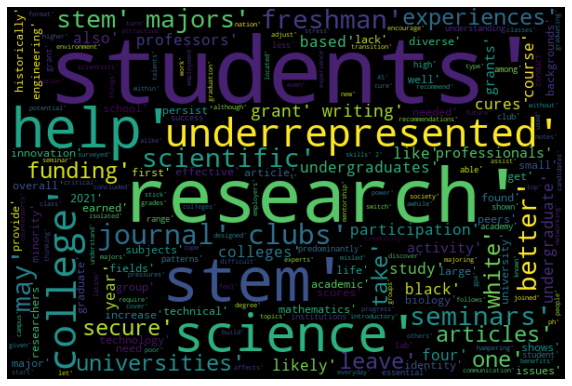

In [228]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(str(words_nonstop))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

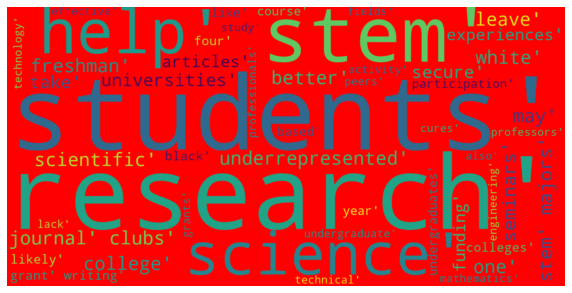

In [289]:
wordcloud = WordCloud(max_words = 50,
                     width=1600, 
                     height= 800,
                     background_color ='red',
                     repeat=True).generate(str(words_nonstop))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

I have not an explanation for the final apostrophe present in every word in the CloudWord.

## Nivell 3. Exercici 1. Realitza sentiment analysis al teu conjunt de dades.

In [3]:
from textblob import TextBlob
from string import punctuation
import nltk
import re
from nltk.corpus import stopwords

The data is abou a small piece of the review of the movie "Do not look up" done by media journalists.

Data source: https://www.filmaffinity.com/us/pro-reviews.php?movie-id=521393 

Clean and Tokenize Text With Python: https://dylancastillo.co/nlp-snippets-clean-and-tokenize-text-with-python/

In [48]:
some_text = open("STEM.txt","r",encoding='utf-8').read().lower()

In [49]:
blob = TextBlob(some_text)

In [50]:
sentiment = blob.sentiment.polarity # -1 to 1

In [51]:
print(sentiment)

0.16050945709010228


Even than the text used is an cientific article, the sentiment analysis gives a positive value (more than 0).

Let's try this time with another kind of data, in this case with journalists opinions about the movie Don't look up that are download in a csv file from the page: https://www.filmaffinity.com/us/film521393.html

In [6]:
opinion = pd.read_csv("dont-look-up_opinionsok.csv")
opinion.head()

,country,media,author,quote
0,"USA,""San Francisco Chronicle"",""Mick LaSalle"",""...",NaN,NaN,NaN
1,"USA,""The Hollywood Reporter"",""David Rooney"",""A...",NaN,NaN,NaN
2,"USA,""IndieWire"",""David Ehrlich"",""Depressing (....",NaN,NaN,NaN
3,"USA,""CNN"",""Brian Lowry"",""Don't Look Up' delive...",NaN,NaN,NaN
4,"USA,""New York Post"",""Johnny Oleksinski"",""Leo a...",NaN,NaN,NaN


In [7]:
# the data are separated by quotation marks. We proceed to split the data.
df = opinion.country.str.split(pat='"',expand=True)
df.head()

,0,1,2,3,4,5,6
0,"USA,",San Francisco Chronicle,",",Mick LaSalle,",",Don�t Look Up might be the funniest movie of 2...,�
1,"USA,",The Hollywood Reporter,",",David Rooney,",","A cynical, insufferably smug satire stuffed to...",�
2,"USA,",IndieWire,",",David Ehrlich,",",Depressing (...) A witless satire about the en...,�
3,"USA,",CNN,",",Brian Lowry,",",Don't Look Up' delivers a scathing satire that...,�
4,"USA,",New York Post,",",Johnny Oleksinski,",",Leo and JLaw actually hilarious in end-of-worl...,None


In [8]:
df.shape

(26, 7)

__Remove unneeded columns__

In [9]:
df2 = df.iloc[:,[0,1,3,5]]
df2.head()

,0,1,3,5
0,"USA,",San Francisco Chronicle,Mick LaSalle,Don�t Look Up might be the funniest movie of 2...
1,"USA,",The Hollywood Reporter,David Rooney,"A cynical, insufferably smug satire stuffed to..."
2,"USA,",IndieWire,David Ehrlich,Depressing (...) A witless satire about the en...
3,"USA,",CNN,Brian Lowry,Don't Look Up' delivers a scathing satire that...
4,"USA,",New York Post,Johnny Oleksinski,Leo and JLaw actually hilarious in end-of-worl...


In [10]:
df2.columns = ['country', 'media', 'author', 'quote']
df2.tail()

,country,media,author,quote
21,"USA,",The Film Stage,Ethan Vestby,Adam McKay's satirical doomsday comedy hits mo...
22,"USA,",The Verge,Andrew Webster,An emotional ride through the absurd (...) I'm...
23,"USA,",ABC News,Peter Travers,McKay retreats to the obvious when we most wan...
24,"USA,",IGN,Samantha Nelson,While McKay makes some missteps with his direc...
25,"USA,",Los Angeles Times,Justin Chang,"[Here], evil is finally too banal to be funny...."


<ipython-input-11-f652aef626a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_length'] = df2['quote'].astype(str)
<ipython-input-11-f652aef626a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_length'] = df2['quote'].apply(len)


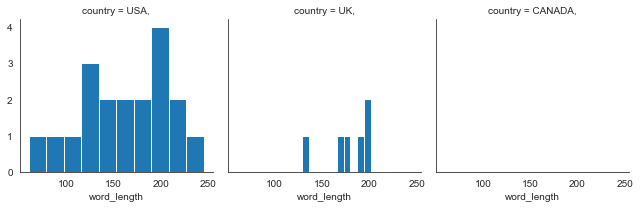

In [11]:
df2['word_length'] = df2['quote'].astype(str)
df2['word_length'] = df2['quote'].apply(len)
sns.set_style('white')
g=sns.FacetGrid(df2,col='country')
g.map(plt.hist,'word_length')

In [12]:
sentences = list(df2 ['quote'])  # selecting only the text
print(sentences[:100])

['Don�t Look Up might be the funniest movie of 2021. It�s the most depressing too, and that odd combination makes for a one-of-a-kind experience. Adam McKay gives you over two hours of laughs while convincing you that the world is coming to an end', 'A cynical, insufferably smug satire stuffed to the gills with stars that purports to comment on political and media inattention to the climate crisis but really just trivializes it', "Depressing (...) A witless satire about the end of the world (...) It isn't smart enough to be a wakeup call or shocking enough to scare people straight", "Don't Look Up' delivers a scathing satire that occasionally veers off course (...) A sobering message, but one that comes barreling toward us through the lens of an uneven movie", 'Leo and JLaw actually hilarious in end-of-world satire �Don�t Look Up� (...) it�s entertaining and fun (...) ', 'McKay�s ill-advised Sorkinization�his eagerness to prove himself a man of principles and not just chortles�continue

In [14]:
sentences = df2 ['quote']
sentences

0     Don�t Look Up might be the funniest movie of 2...
1     A cynical, insufferably smug satire stuffed to...
2     Depressing (...) A witless satire about the en...
3     Don't Look Up' delivers a scathing satire that...
4     Leo and JLaw actually hilarious in end-of-worl...
5     McKay�s ill-advised Sorkinization�his eagernes...
6     Don't Look Up' takes the pulse of contemporary...
7     Don't Look Up is like a 145-minute Saturday Ni...
8     Starry, silly disaster flick (...) It's hard n...
9     Don�t Look Up� is a satire in the mold of �Dr....
10    A smug, glib miscalculation from Adam McKay (....
11    Jennifer Lawrence, Leonardo DiCaprio and an am...
12    Don't Look Up' is absolutely right about about...
13    A different kind of disaster movie, where the ...
14    How I learned to stop worrying and love 'Don't...
15    Best of all is Timothee Chalamet (...) One can...
16    Don't Look Up' makes a surprisingly deep impac...
17    What makes 'Don't Look Up' such a movie of

In [78]:
# Apply TextBlob for sentiment polarity scores for all the column 'quote'

df2['sentiment'] = df2['quote'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2.head(5)

<ipython-input-78-f44f375656fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = df2['quote'].apply(lambda x: TextBlob(x).sentiment.polarity)


,country,media,author,quote,word_length,sentiment
0,"USA,",San Francisco Chronicle,Mick LaSalle,Don�t Look Up might be the funniest movie of 2...,245,0.058333
1,"USA,",The Hollywood Reporter,David Rooney,"A cynical, insufferably smug satire stuffed to...",180,-0.133333
2,"USA,",IndieWire,David Ehrlich,Depressing (...) A witless satire about the en...,152,-0.197619
3,"USA,",CNN,Brian Lowry,Don't Look Up' delivers a scathing satire that...,177,-0.266667
4,"USA,",New York Post,Johnny Oleksinski,Leo and JLaw actually hilarious in end-of-worl...,109,0.433333


In [79]:
df2.describe()  # Describe the columns

,word_length,sentiment
count,26.000000,26.000000
mean,163.923077,0.103034
std,44.516894,0.265684
min,60.000000,-0.280556
25%,131.500000,-0.087500
50%,170.000000,0.034010
75%,200.250000,0.274479
max,245.000000,0.750000


The mean of all opinions are mainly positive. The mean of all coments has a 0.10 with the highest score of 0.75 and de lowest -0.28.

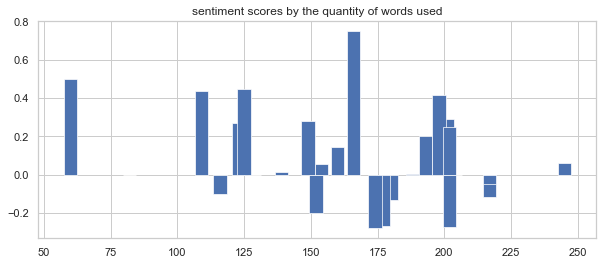

In [102]:
x = df2['word_length']
y = df2['sentiment']
fig, ax = plt.subplots(figsize =(10, 4))
ax.bar(x, y, width=5, edgecolor="white", linewidth=0.7)
plt.title("sentiment scores by the quantity of words used")
plt.show()